<a href="https://colab.research.google.com/github/adithyamauryakr/pytorchtutorials/blob/main/ann_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:00<00:00, 121MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
df = pd.read_csv(path + "/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


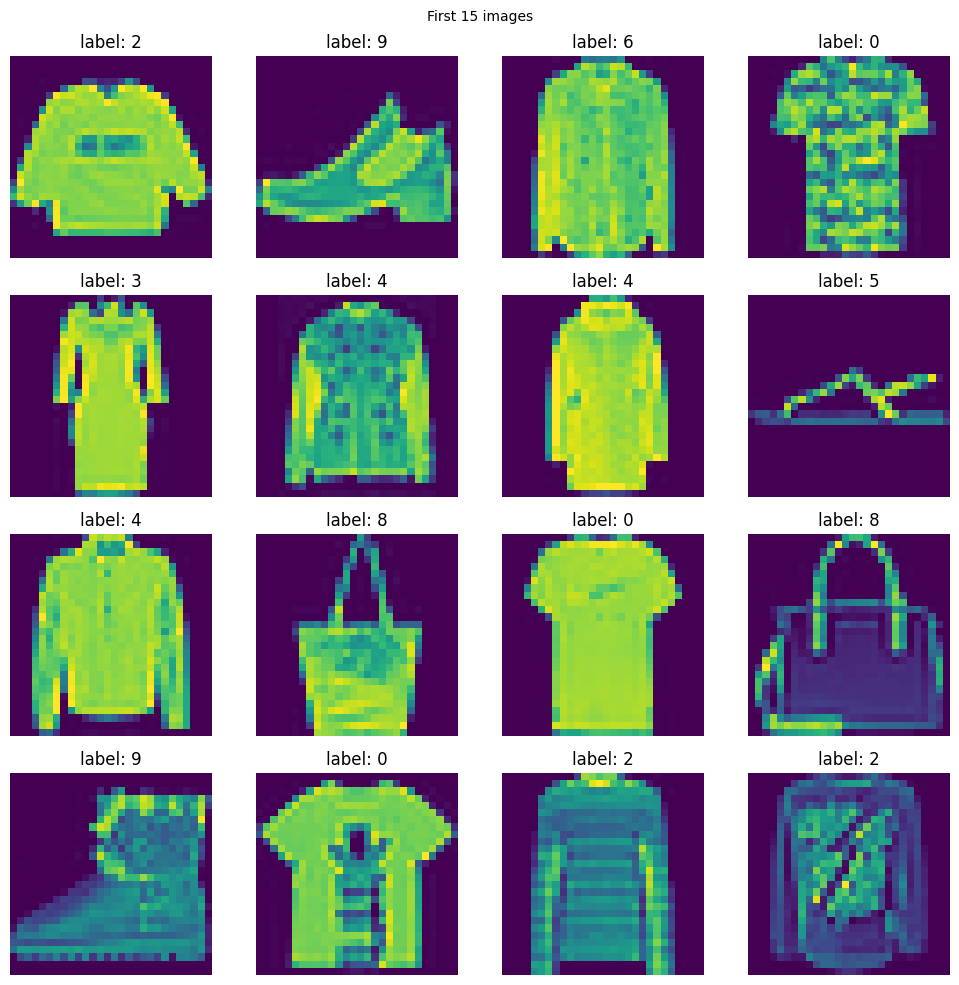

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 15 images", fontsize=10)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28) # reshape to 28x28
  ax.imshow(img) # display in grayscale
  ax.axis('off') # remove axis for a cleaner look
  ax.set_title(f'label: {df.iloc[i,0]}') # show the lable

plt.tight_layout()
plt.show()

In [10]:
# For cpu only
X = df.iloc[:6000, 1:].values
y = df.iloc[:6000, 0].values

In [8]:
# For gpu only
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# scaling features:
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long) # torch wants labels in long dtype

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [12]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [13]:
test_dataset = CustomDataset(X_test, y_test)


Use `pin_memory = True` for huge datasets


`train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True, pin_memory=True)`

`test_loader =  DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)`

In [14]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader =  DataLoader(test_dataset, batch_size=32, shuffle=False) # False bcuz we don't want data being shuffled during preds
# if true acc and stuff might be affected

In [15]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [16]:
# Set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [17]:
# instantiate model
model = MyNN(X_train.shape[1])
model = model.to(device) # moving to gpu
# loss func
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calc loss
    loss = criterion(outputs, batch_labels)

    optimizer.zero_grad()

    #back pass
    loss.backward()

    #update parameters
    optimizer.step()

    total_epoch_loss= total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.6353
Epoch 2, Loss: 0.4305
Epoch 3, Loss: 0.3861
Epoch 4, Loss: 0.3585
Epoch 5, Loss: 0.3376
Epoch 6, Loss: 0.3228
Epoch 7, Loss: 0.3079
Epoch 8, Loss: 0.2950
Epoch 9, Loss: 0.2855
Epoch 10, Loss: 0.2747
Epoch 11, Loss: 0.2683
Epoch 12, Loss: 0.2581
Epoch 13, Loss: 0.2494
Epoch 14, Loss: 0.2444
Epoch 15, Loss: 0.2386
Epoch 16, Loss: 0.2316
Epoch 17, Loss: 0.2256
Epoch 18, Loss: 0.2203
Epoch 19, Loss: 0.2121
Epoch 20, Loss: 0.2096
Epoch 21, Loss: 0.2062
Epoch 22, Loss: 0.1999
Epoch 23, Loss: 0.1953
Epoch 24, Loss: 0.1931
Epoch 25, Loss: 0.1876
Epoch 26, Loss: 0.1837
Epoch 27, Loss: 0.1802
Epoch 28, Loss: 0.1733
Epoch 29, Loss: 0.1705
Epoch 30, Loss: 0.1704
Epoch 31, Loss: 0.1670
Epoch 32, Loss: 0.1637
Epoch 33, Loss: 0.1623
Epoch 34, Loss: 0.1572
Epoch 35, Loss: 0.1545
Epoch 36, Loss: 0.1546
Epoch 37, Loss: 0.1462
Epoch 38, Loss: 0.1424
Epoch 39, Loss: 0.1414
Epoch 40, Loss: 0.1423
Epoch 41, Loss: 0.1376
Epoch 42, Loss: 0.1390
Epoch 43, Loss: 0.1354
Epoch 44, Loss: 0.12

In [19]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    # extract labels
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()


print(correct/total)

0.8898333333333334


A bit improvement in accuracy (cpu=0.86, gpu=0.89)

In [21]:
# evaluation code on training data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    # extract labels
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()


print(correct/total)

0.9824791666666667


# Model is overfitting
Solutions:
* add more data
* reducing complexity of NN arch
* regularisation
* dropouts
* data augmentation
* batch normalisation
* early stopping

### Here can't do 1, 2 (already simple arch), 5 is good for CNNs, 6 is good to training stabilisation
we'll try 3, 4, 6

In [23]:
# applying dropouts:

class MyNNwithdropout(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Dropout(p=0.3), # p: percentage of neurons to turn off
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

Batch Normalisation:
* applied to hidden layers
* applied after linear layer before activation layer
* normalise activations
* learnable parameters: gamma (scaling) and beta (shifting)
* improves training stability
* regularisation effect
* consistent during evaluation

In [ ]:
# batch norm
# applying dropouts:

class MyNNwithdropout(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3), # p: percentage of neurons to turn off
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [24]:
# instantiate model with L2 regularisation
model = MyNNwithdropout(X_train.shape[1])
model = model.to(device) # moving to gpu
# loss func
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4) # weigh_decay: lamda for reg

In [25]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calc loss
    loss = criterion(outputs, batch_labels)

    optimizer.zero_grad()

    #back pass
    loss.backward()

    #update parameters
    optimizer.step()

    total_epoch_loss= total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.7489
Epoch 2, Loss: 0.5196
Epoch 3, Loss: 0.4702
Epoch 4, Loss: 0.4441
Epoch 5, Loss: 0.4253
Epoch 6, Loss: 0.4084
Epoch 7, Loss: 0.3977
Epoch 8, Loss: 0.3879
Epoch 9, Loss: 0.3756
Epoch 10, Loss: 0.3710
Epoch 11, Loss: 0.3640
Epoch 12, Loss: 0.3613
Epoch 13, Loss: 0.3526
Epoch 14, Loss: 0.3474
Epoch 15, Loss: 0.3465
Epoch 16, Loss: 0.3440
Epoch 17, Loss: 0.3373
Epoch 18, Loss: 0.3332
Epoch 19, Loss: 0.3307
Epoch 20, Loss: 0.3293
Epoch 21, Loss: 0.3255
Epoch 22, Loss: 0.3214
Epoch 23, Loss: 0.3232
Epoch 24, Loss: 0.3134
Epoch 25, Loss: 0.3167
Epoch 26, Loss: 0.3122
Epoch 27, Loss: 0.3111
Epoch 28, Loss: 0.3115
Epoch 29, Loss: 0.3061
Epoch 30, Loss: 0.3070
Epoch 31, Loss: 0.3033
Epoch 32, Loss: 0.3019
Epoch 33, Loss: 0.3034
Epoch 34, Loss: 0.2975
Epoch 35, Loss: 0.2954
Epoch 36, Loss: 0.2972
Epoch 37, Loss: 0.2935
Epoch 38, Loss: 0.2938
Epoch 39, Loss: 0.2923
Epoch 40, Loss: 0.2922
Epoch 41, Loss: 0.2949
Epoch 42, Loss: 0.2896
Epoch 43, Loss: 0.2861
Epoch 44, Loss: 0.28

In [26]:
# evaluation code
model.eval()

total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    # extract labels
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()


print(correct/total)

0.8898333333333334


In [27]:
# evaluation code
model.eval()

total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    # extract labels
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()


print(correct/total)

0.9341041666666666


Dropped acc in training data, in a way reduced the diff of acc in train and test preds from before